In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from copy import deepcopy
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

font = {'size'   : 15}
plt.matplotlib.rc('font', **font)y

In [2]:
def normalize(X_in, a=0, b=1):
    return (b - a) * (X_in - np.min(X_in)) / (np.max(X_in) - np.min(X_in)) + a

# Download the data

* Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
* Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* Name - Name
* Sex - Sex
* Age - Age
* Sibsp - Number of Siblings/Spouses Aboard
* Parch - Number of Parents/Children Aboard
* Ticket - Ticket Number
* Fare - Passenger Fare
* Cabin - Cabin
* Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1diQwKhuDDGoGfMGpESAiqvgESU3vXEdJ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1diQwKhuDDGoGfMGpESAiqvgESU3vXEdJ" -O titanic.zip && rm -rf /tmp/cookies.txt

--2023-03-21 02:54:07--  https://docs.google.com/uc?export=download&confirm=&id=1diQwKhuDDGoGfMGpESAiqvgESU3vXEdJ
Resolving docs.google.com (docs.google.com)... 173.194.215.100, 173.194.215.113, 173.194.215.139, ...
Connecting to docs.google.com (docs.google.com)|173.194.215.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/via49lqll6mlb8bvtoifok76pi0to28f/1679367225000/13633584189499636757/*/1diQwKhuDDGoGfMGpESAiqvgESU3vXEdJ?e=download&uuid=e36db0af-2d5b-46c1-90cc-b96c927ec089 [following]
--2023-03-21 02:54:07--  https://doc-0s-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/via49lqll6mlb8bvtoifok76pi0to28f/1679367225000/13633584189499636757/*/1diQwKhuDDGoGfMGpESAiqvgESU3vXEdJ?e=download&uuid=e36db0af-2d5b-46c1-90cc-b96c927ec089
Resolving doc-0s-5c-docs.googleusercontent.com (doc-0s-5c-docs.googleusercontent.com)... 173.194.210.1

In [4]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [5]:
train = pd.read_csv('train.csv')
display(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
survived = train['Survived'].values == 1
died = train['Survived'].values == 0

Plot hist

In [7]:
def plot_feature_hist(feature_name, ax):
    ax.set_title(feature_name)
    x = train[feature_name]
    ax.hist(x, alpha=0.5, label='Total')
    ax.hist(x[died], alpha=0.5, label='Died')
    ax.hist(x[survived], alpha=0.5, label='Survived')
    ax.legend()

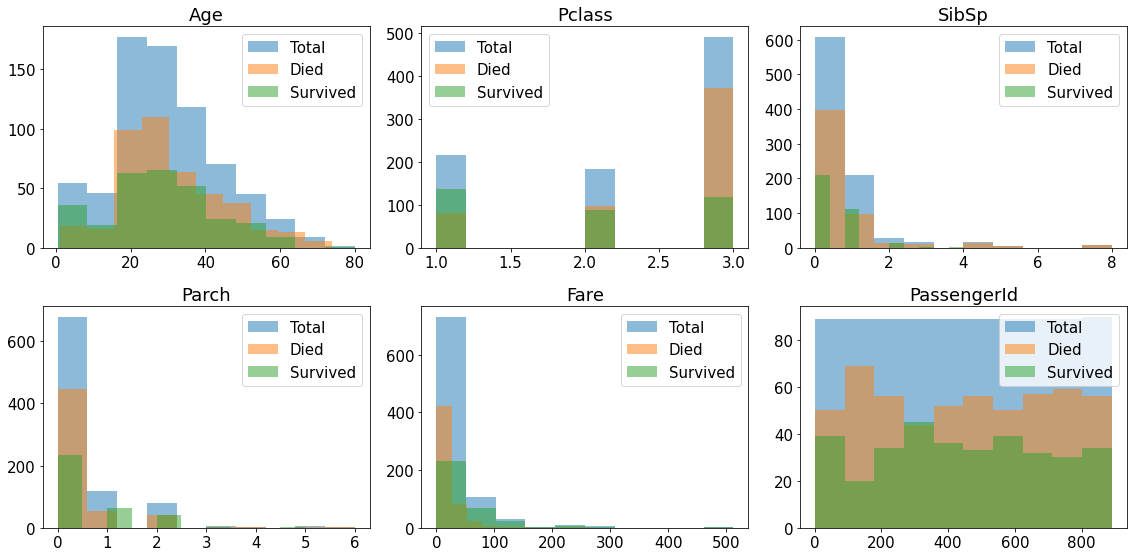

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))

feature_name_lst = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'PassengerId']
for i, feature_name in enumerate(feature_name_lst):
    ax = axs.ravel()[i]
    plot_feature_hist(feature_name, ax)

plt.tight_layout()

print unique values

In [9]:
feature_name_lst = ['Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked']
for feature_name in feature_name_lst:
    X = train[feature_name].astype(str)
    print(np.unique(X))

['1' '2' '3']
['0' '1' '2' '3' '4' '5' '8']
['0' '1' '2' '3' '4' '5' '6']
['female' 'male']
['C' 'Q' 'S' 'nan']


count nans

In [10]:
def count_nans(feature_name):
    n_nans = np.count_nonzero(np.isnan(train[feature_name]))
    not_nans = np.count_nonzero(~np.isnan(train[feature_name]))
    if n_nans > 0:
        print(f'{feature_name}: {n_nans} NaNs out of {not_nans + n_nans}')
    else:
        print(f'{feature_name}: no NaNs')

In [11]:
feature_name_lst = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'PassengerId'] # list(train.keys()) 
for feature_name in feature_name_lst:
    count_nans(feature_name)

Age: 177 NaNs out of 891
Pclass: no NaNs
SibSp: no NaNs
Parch: no NaNs
Fare: no NaNs
PassengerId: no NaNs


# Task 1:
## Perform Logistic Regression
Create feature vector containing Age, Pclass, SibSp, Parch, Fare and do a classification via LogisticRegression

Documentation:

* [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

Lecture codes:

* [GitHub](https://github.com/GitGreg228/sepmp_ml_2023/tree/main/lecture_codes)

In [12]:
def nans_to_zeros(input_array):
    mask = np.isnan(input_array)
    input_array[mask] = 0
    return input_array

In [13]:
train = pd.read_csv('train.csv')

train['Age'] = nans_to_zeros(train['Age'].values)
X = train[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']].values
y = train['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

## Plot ROC curve and calculate AUC

Documentation:

* [ROC curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
* [AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)

In [15]:
def plot_roc(clf, ax, title=''):
    if title:
        ax.set_title(title)
    y_score = clf.predict_proba(X_train)
    fpr, tpr, _ = roc_curve(y_train, y_score[:, 1])
    auc_train = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'Train: {round(auc_train, 3)}')
    y_score = clf.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test,  y_score[:, 1])
    auc_test = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'Test: {round(auc_test, 3)}')
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR')
    ax.legend()

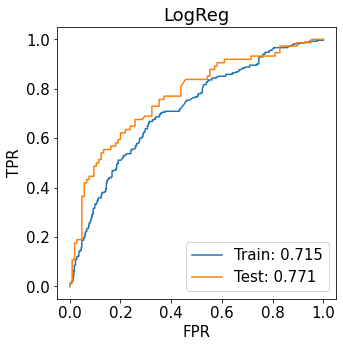

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plot_roc(clf, ax, title='LogReg')

# Task 2
## Add other features

Convert 'Sex' and 'Embarked' to numbers and add to dataset



In [17]:
def str_to_int(arr):
    arr = deepcopy(arr.values.astype(str))
    unique = np.unique(arr)
    for i in range(unique.shape[0]):
        arr[arr == unique[i]] = i
    return arr.astype(int)

In [18]:
train = pd.read_csv('train.csv')

train['Sex'] = str_to_int(train['Sex'])
train['Embarked'] = str_to_int(train['Embarked'])
train['Age'] = nans_to_zeros(train['Age'].values)
X = train[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']].values
y = train['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

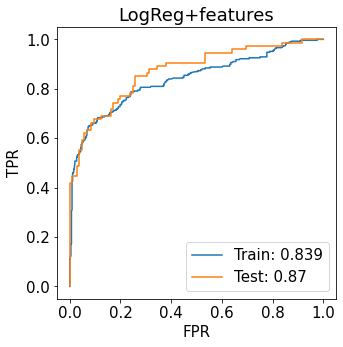

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plot_roc(clf, ax, title='LogReg+features')

# Task 3
## Try other classifiers, reach AUC > 0.89 on test

Documentation:

* [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) - at which `max_depth` does the overfitting occur?
* [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) - at which `n_neighbors` does the overfitting occur?
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) - at which parameter values does the overfitting occur?

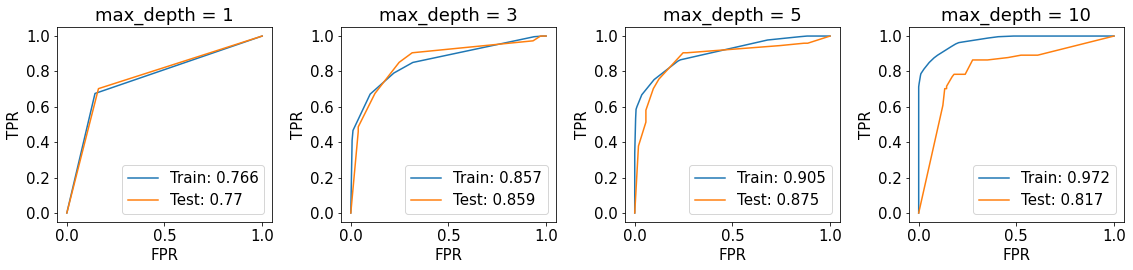

In [21]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i, max_depth in enumerate([1, 3, 5, 10]):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    plot_roc(clf, axs[i], title=f'max_depth = {max_depth}')

plt.tight_layout()

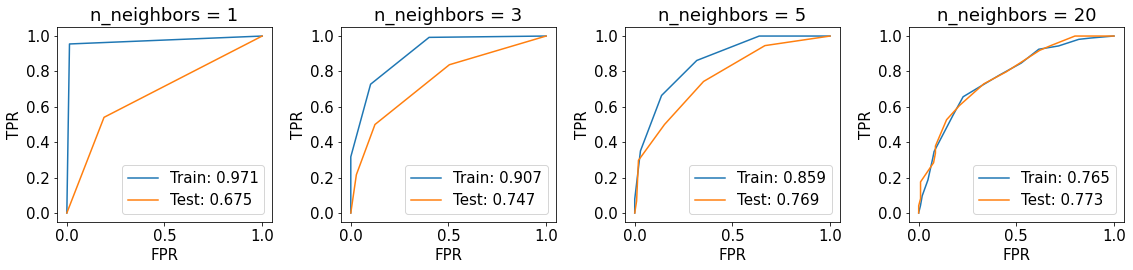

In [22]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i, n_neighbors in enumerate([1, 3, 5, 20]):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    plot_roc(clf, axs[i], title=f'n_neighbors = {n_neighbors}')

plt.tight_layout()

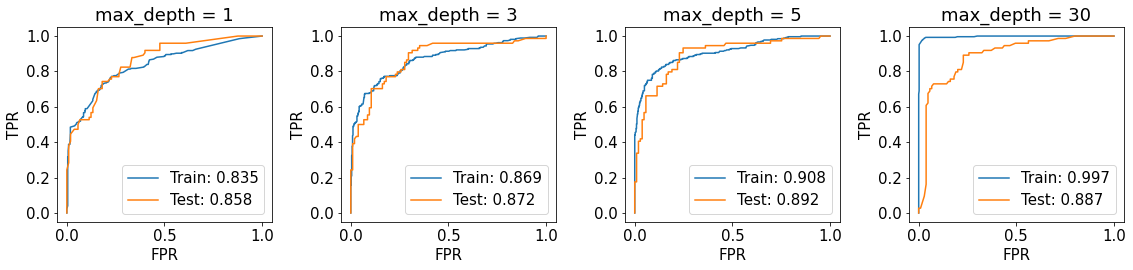

In [23]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i, max_depth in enumerate([1, 3, 5, 30]):
    clf = RandomForestClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    plot_roc(clf, axs[i], title=f'max_depth = {max_depth}')

plt.tight_layout()

# Task (optional) other features

Explore [link](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/)

Try to create new features and see if they will help